### メモ（清書前）

MD計算：分子運動学計算

研究の手順

1. 何を計算するか決める      
    参考書の例に沿って、キセノン固体と液体の分子運動を見る
2. 系の粒子数を決める    
    まずは少なく16個
3. ポテンシャル関数を選択する    
    希ガス同士の分子間力は、
        ・ 分散力による引力
        ・ 電子の重なり合いによる斥力
    を考えれば良い。
    こういうときは、レナード・ジョーンズポテンシャル（LJポテンシャル）を用いる。
$$V_{LJ}(r) = 4\epsilon \left(\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right)$$
    
    三体相互作用などの多体相互作用は無視して、系全体のポテンシャルエネルギーは二体ポテンシャルの和として表す。
$$V_{N}({\bf r}^N) = {\sum \sum}_{i>j} V_{LJ}(r_{ij})$$
    これはpairwise additivityという、よく使われる近似。
4. 統計アンサンブルを選択する    
    系の熱力学的状態を示す3つの自由度のうち1つは粒子数Nを固定するとして、残り2つをどうするか。
    ・ 圧力P、温度Tを一定：NPT(等温等圧)アンサンブル
    ・ 体積V、温度Tを一定：NVT(カノニカル)アンサンブル
    ・ 全エネルギーE、体積Vを一定：NEV(ミクロカノニカル)アンサンブル
    今回はNPTアンサンブル。
    等温線に沿って圧力を計算し、マクスウェルの当面積則を適用する。
5. MD計算をする
    1. 初期条件を計算する。
        1. 初期配置    
            効率よく計算するため、極端な配置は避ける。
            低分子液体の初期配置には結晶構造が多く用いられる。
            キセノンは面心立方格子を構成するため、これを初期配置とする。
        2. 初期速度    
            結晶構造では、配置の対称性より、分子に掛かる力は0となる。
            このままではシュミレートしても変化がないため、分子に初期速度を与える。
            指定温度でのマクスウェル・ボルツマン分布に沿うものが良いが、適当な値でもそんなに問題はない。    
    2. 時間ｔにおいて各分子が受ける力とトルクを計算する。    
        LJポテンシャルを仮定したので、分子の位置ベクトルを${\bf r}_i (i = 1,2,...,N)$、分子ｊから分子いへのベクトルを${\bf r}_{ij} (={\bf r}_i - {\bf r}_j)$とすると、i番目のキセノン分子に掛かる力${\bf F}_i$は、
$$ {\bf F}_i = - \frac{dV({\bf r}^N)}{d{\bf r}_i} \\
= - \sum_j \frac{dV_{LJ}(r_{ij})}{dr_{ij}} \frac{{\bf r}_{ij}}{r_{ij}} \\
= \sum_j \frac{4\epsilon}{\sigma} \left\{ 12 \left( \frac{\sigma}{r_{ij}} \right) ^{13} - 6\left( \frac{\sigma}{r_{ij}} \right)^7 \right\}\frac{{\bf r}_{ij}}{r_{ij}} $$
        また、実際の系では容器と接する面などで表面効果が現れるが、これは周期境界条件を用いることで取り除ける。これは基本セルのうち、向かい合う面同士が続いているように考えるものである。ここでポテンシャルカット${\bf r}_c$を基本セルの長さLの半分未満で取る。ポテンシャルカットより遠い距離の分子との相互作用は無視する。さらに、ポテンシャルカットより近い分子のうち、最も近い分子とだけ相互作用すると考える。これをminimum image conventionという。${\bf r}_c$を実際にどう取るかについて。LJポテンシャルでは、分子間力エネルギーは$1/r^6$に比例して0に収束する。キセノン間の相互作用エネルギーのグラフから、${\bf r}_c=3\sim 4\sigma$とすれば良いとわかる。しかし、クーロン相互作用や双極子-双極子相互作用などを考える場合は長距離力も無視できず、エワルドの方法などを用いる。
    3. 運動方程式を解く    
        キセノンのような1個の質点からのみなるN個の分子が、ある一定の退席中で行う運動を追跡するには、ニュートンの第二法則を用いればいい。
$$m_i \frac{d^2{\bf r}_i(t)}{dt^2} = {\bf F}_i(t)$$
        一方、水分子など形のある分子は、以下の3つの方法がある。
            1. 各結合角をバネで結び、その上で3原子についてニュートン第二法則を計算する    
            2. 水分子を剛体回転子として、伸縮と偏角の自由度を拘束条件で固定し、その上で3原子についてニュートン第二法則を計算する    
            3. 水分子を剛体回転子として、回転に対するオイラーの方程式を適用する    　
        微分方程式の数値解を求めるにも、3つの方法がある。
            1. 差分近似法    
                第二法則を解くだけなら、簡単なのでこれ。    
            2. 予測子-修正子法    
                複雑な形の微分方程式が得意。    
            3. 時間発展演算子法    
                周りから影響を受けやすいなどの細かい時間で計算が必要な粒子と、そうでない粒子か混在している系で、効率よく計算できる。
    4. 分子の軌跡を求める   
        表示やら保存やら解析やらなんなり...    
    5. 平衡化    
        目的の平衡状態に収束しているか確認
            1. ポテンシャルエネルギーの収束    
            2. 温度の収束
            3. 目的としてる物理量の収束    
        まだ平衡してなければ、Bに戻る。
    6. 平均値の算出    
        平衡状態に達したら、結果を平均値で求める。誤差の見積もりも大事。

In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random

$$V_{LJ}(r) = 4\epsilon \left(\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right)$$
にて、$V_{LJ}(r) = 0$となるrが、2つのキセノンの平衡距離となる。    
キセノン-キセノンでのフィッティングパラメータ$\sigma$は、$4.009\mathrm{\mathring{A}}=4.009\times 10^{-10}m$となる。    
$\epsilon$は、$1.28\times 10^{-13}erg=1.28\times 10^{-20}J$となる。

In [14]:
sig = 4.06*pow(10, -10)
k = 1.38*pow(10, -23) # ボルツマン定数
eps = 229 * k
lat_x = sig *2 # sigma*2^(1/6)=r=平衡距離: x
lat_y = sig *2
Lx = 8 # 格子点: x
Ly = 8
N_atom = Lx*Ly
m= 131.293 / (6.02*pow(10, 23))  # 質量[kg]

density = N_atom/(Lx*Ly*lat_x*lat_y) # 数密度: 2次元
print ("密度は", density, "[/m^2]です")

密度は 1.5166589822611566e+18 [/m^2]です


In [38]:
lat_x/delta_t

2.2785979580680272e-07

<IPython.core.display.Javascript object>


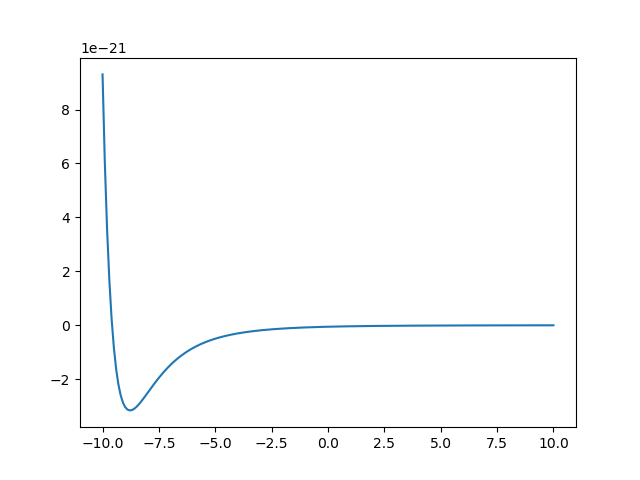

In [11]:
r = np.linspace(lat_x/1.2,sig*4,200)
b = 4*eps*(pow((sig/r),12)-pow((sig/r),6))
plt.plot(a,b)
plt.show()

<IPython.core.display.Javascript object>


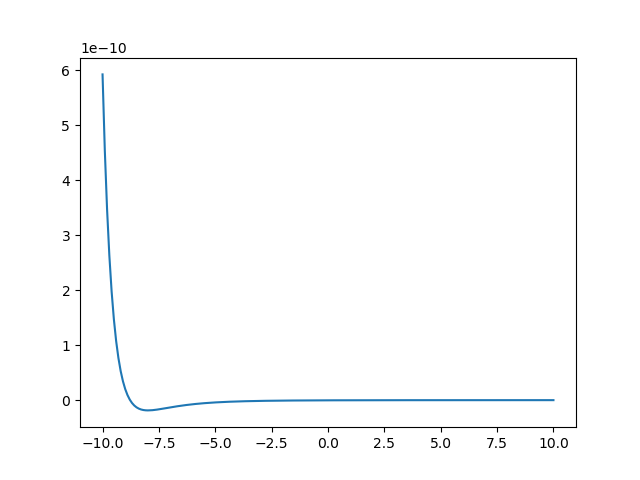

In [32]:
f = -4*eps*(6*pow((sig/r),6)-12*pow((sig/r),12))/r
plt.plot(a,f)
plt.show()

In [3]:
delta_t = 0.000002 # MDステップの間隔

T_initial = 80  # 初期温度 [K]

In [4]:
def Maxwell_velocity2D(temperature): # マクスウェルの速度分布: ボックス-ミュラー法
    for i in range(N_atom):
        R1=random.random()
        R2=random.random()
        R3=random.random()
        R4=random.random()
        vx[i] = (np.sqrt(-2* (k*temperature)*np.log(R1)))*np.cos(2*np.pi*R2)
        vy[i] = (np.sqrt(-2* (k*temperature)*np.log(R3)))*np.cos(2*np.pi*R4)

In [5]:
# 配置と速度の初期化
def initialpos_Maxwellvel():
    # 配置
    i=0
    for ix in range(Lx):
        for iy in range(Ly):
            x[i] = lat_x*ix
            y[i] = lat_y*iy
            i += 1
    # 速度
    Maxwell_velocity2D(T_initial)

$$ {\bf F}_i = \sum_j \frac{4\epsilon}{\sigma} \left\{ 12 \left( \frac{\sigma}{r_{ij}} \right) ^{13} - 6\left( \frac{\sigma}{r_{ij}} \right)^7 \right\}\frac{{\bf r}_{ij}}{r_{ij}}\\
= \sum_j \frac{4\epsilon}{\sigma ^2} \left\{ 12 \left( \frac{\sigma}{r_{ij}} \right) ^{14} - 6\left( \frac{\sigma}{r_{ij}} \right)^8 \right\}{\bf r}_{ij}\\
= \sum_j \frac{48\epsilon}{\sigma ^2} \left( \frac{\sigma}{r_{ij}} \right) ^8 \left\{ \left( \frac{\sigma}{r_{ij}} \right)^6 - \frac{1}{2} \right\}{\bf r}_{ij}$$

In [ ]:
def updateForces():
    rcut = 3 * sig # ポテンシャルカットオフ半径

    r2cut = rcut**2

    for i in range(N_atom):
        last_fx[i] = fx[i]
        last_fy[i] = fy[i]
        fx[i] = 0
        fy[i] = 0
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            dx = x[i] - x[j]
            dy = y[i] - y[j]

            # 最短距離かどうか
            if (dx > 0.5*lat_x*Lx):
                dx -= lat_x*Lx
            elif (dx < -0.5*lat_x*Lx):
                dx += lat_x*Lx
            if (dy > 0.5*lat_y*Ly):
                dy -= lat_y*Ly
            elif (dy < -0.5*lat_y*Ly):
                dy += lat_y*Ly
            
            r2 = dx**2+dy**2

            if (r2 < r2cut):
                if r2 == 0 :
                    r2 = 0.0001
                sig2 = pow(sig,2)

                wij = -4*eps*(6*pow((sig2/r2),3)-12*pow((sig2/r2),6))/r2
                fijx = wij*dx
                fijy = wij*dy

                fx[i] += fijx
                fy[i] += fijy
                fx[j] -= fijx
                fy[j] -= fijy

In [7]:
initialpos_Maxwellvel() 
r2 = pow(lat_x, 2)
sig2 = pow(sig,2)
f=-4*eps*(6*pow((sig2/r2),3)-12*pow((sig2/r2),6))/pow(r2,1/2)
delta_t*(f+last_fx[0])/2/m

NameError: name 'x' is not defined

In [8]:
# ベレの方法、速度を更新
def updateVel_VerletAlgotirhm():
    for i in range(N_atom):
        vx[i] += delta_t*(fx[i]+last_fx[i])/2/m
        vy[i] += delta_t*(fy[i]+last_fy[i])/2/m

In [9]:
# ベレの方法、位置を更新
def updatePos_VerletAlgotirhm():
    for i in range(N_atom):
        x[i] += delta_t*(vx[i]+delta_t*fx[i]/2/m)
        y[i] += delta_t*(vy[i]+delta_t*fy[i]/2/m)
        while x[i] <= 0: 
            x[i] += lat_x*Lx
        while x[i] >= lat_x*Lx:
            x[i] -= lat_x*Lx
        while y[i] <= 0:
            y[i]  += lat_y*Ly
        while y[i] >= lat_y*Ly:
            y[i] -= lat_y*Ly

In [10]:
initialpos_Maxwellvel() 
vx

NameError: name 'x' is not defined

In [ ]:
x = np.zeros([N_atom],float)
y = np.zeros([N_atom],float)

vx = np.zeros([N_atom],float)
vy = np.zeros([N_atom],float)

fx = np.zeros([N_atom],float)
fy = np.zeros([N_atom],float)  
last_fx = np.zeros([N_atom],float)
last_fy = np.zeros([N_atom],float)  

In [ ]:
# 図保存用変数
ims = []

In [ ]:
%matplotlib nbagg
Max_step = 100  #MD ステップ数

fig = plt.figure(figsize = (6, 6))
initialpos_Maxwellvel()  # 初期状態の構築
time = 1   
n_step=0
while n_step < Max_step:
    if n_step % 50 ==0: 
        print ("step=",n_step)
    if n_step % 5 ==0:
        im=plt.scatter(x, y, s=120, c="red", alpha=0.9, linewidths="1.5",edgecolors="black")
        ims.append([im])      
    n_step += 1
    updateForces()
    print(vx)
    updateVel_VerletAlgotirhm()
    updatePos_VerletAlgotirhm()
plt.axis([0,lat_x*Lx,0,lat_y*Ly])
ani = animation.ArtistAnimation(fig, ims, interval =1)
plt.show() 

In [15]:
n_step

10

In [39]:
lat_x*Lx

3.6457567329088436e-09

In [17]:
(fx[0]+last_fx[0])

0.0

In [52]:
x

array([ 0.44049249, -0.55006791, -0.02077382,  1.0418143 ,  0.09929388,
       -0.72401619,  0.32715214,  0.33164468,  0.75655416,  0.97036127,
       -0.11761895,  0.53008332,  0.1813357 ,  1.2307284 , -0.24308862,
        0.84578756,  0.02710905,  0.49394342,  0.57140298,  0.32353001,
        0.07951508, -0.29329726,  0.51613501, -0.03389995, -0.1824815 ,
       -0.04334613,  0.25279969,  0.08356149,  0.81480359,  0.86321862,
       -0.2509457 , -0.15404092,  0.18158937, -0.12925379, -0.48391939,
       -0.49418008,  0.63722488, -0.66589392,  0.05586368,  0.16095458,
        0.05599865, -0.70861544,  0.0080817 ,  0.74510426, -0.60296378,
        0.49021665, -0.39638499,  0.06316433, -0.47543254, -1.07380253,
        1.11238677,  0.33266149, -0.17943435,  0.11077234, -0.05384589,
        0.10226849,  0.12338987, -0.38662148,  0.23826594, -0.63867964,
       -0.79326169,  0.44060832, -0.15016693,  0.71207987])